# HW3_Fengzhang_Du 

* python 3.7
* platform Mac
### Done: 
* Linear classifier.
* Multiclass classifier.
* Computation of the error measure for the multiclass classifier E_in and E_val.
* 5-fold Cross Validation
* Report

### Project Setup:
Multiclass Perceptron algorithm with one linear function for each class.

For `k=10` classes, target are numbered `0,1,...,9`. For `d`-dimensional data, the classifier will be parametrized by:
* `w`: this is a `kxd` numpy array with one row for each class

Thus the linear function for class `i` (where `i` lies in the range `0` to `9`) is given by `w[i]`.

Function **predict(w, x, k = 10)**: takes input of a linear classifier (`w`) as well as a data point (`x`) and returns the prediction of that classifier at `x`.

Function **fit(x_train, y_train, x_test, y_test, q, n_iter=60, k=10):**:
* `x_train`: n-by-d numpy array with n data points, each d-dimensional
* `y_train`: n-dimensional numpy array with the labels (in the range `0` to `k-1`)
* `q`: the degree we want to fit.
* `n_iters`: number of iterations
* `k`: the number of classes, k = 10 as default


### 5 Flods Cross Validation

* split data into 5 piece with no repetition.
* fit each set of the training data and take the average of all to get the final error rate.

Function **cv5(x_train_cv, y_train_cv, x_test_cv, y_test_cv, q, n_iter=60, k=10)**:
* tekes same parameters as the function fit( ), use as an outter function of function fit( ).

In [77]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
import sklearn.linear_model as sk
plt.rcParams["figure.figsize"] = (5, 3) # (w, h)
plt.rcParams["figure.dpi"] = 140
from sklearn.preprocessing import PolynomialFeatures

digits = datasets.load_digits()
# modify cancer.data, stack 1 in front of each data point
digits.data = np.insert(digits.data, 0, 1, axis=1)


In [135]:
# 5 flods cross validation, generate 5 folds. and store in lists.

x_train_cv = []
x_test_cv = []
y_train_cv = []
y_test_cv = []
step = 359
from_ = 0
to = 359  

for i in range(5):

    x_test = digits.data[from_: from_+step] # 0:359:718
    y_test = digits.target[from_: from_+step]
    x_train = np.append(digits.data[0:from_], digits.data[to:1797], axis=0)
    y_train = np.append(digits.target[0:from_], digits.target[to:1797], axis=0)
    
    x_train_cv.append(x_train)
    x_test_cv.append(x_test)
    y_train_cv.append(y_train)
    y_test_cv.append(y_test)

    from_ += step
    to += step

In [138]:
# Multiclass Classifier 

# predict one point
def predict(w, x, k = 10):
    # 10 classes in total, label: 0-9
    score = np.zeros(k)
    for i in range(k):
        score[i] = np.dot(x, w[i,:])
    return int(np.argmax(score))     # argmax return the index value of the the max.


# training function
error_rate = []
error_rate_test = []
iteration = []
w_ = []
def fit(x_train, y_train, x_test, y_test, q, n_iter=60, k=10):
    
    #     transfer feature space to higher dimension  
    poly_features = PolynomialFeatures(degree=q, include_bias=False) 
    x_train_poly = poly_features.fit_transform(x_train)
    x_test_poly = poly_features.fit_transform(x_test)

    n, d = x_train_poly.shape

    w = np.zeros((k,d)) # initialize w0 = w1 = w2 =... = w9
    
    iters = 0
    error = 0
    cur_error_rate = 100.0    # error_rate for current iteration
    
    for i in range(n_iter):   
        # start iterate/test each point in the traing set using the current w
        for xi, yi in zip(x_train_poly, y_train):         
            y_pred = predict(w, xi)
            y_real = int(yi)
            
            if (y_pred != y_real):          
                error += 1
                w[y_real] += xi
                w[y_pred] -= xi               
                cur_error_rate = error/n 

        error = 0
        iters += 1

    w_pocket = w
    w_.append(w_pocket)
    return cur_error_rate


# 5 flods cross validation
def cv5(x_train_cv, y_train_cv, x_test_cv, y_test_cv, q, n_iter=60, k=10):
    for i in range(5):
        e_rate = 0
        e_rate += fit(x_train_cv[i], y_train_cv[i], x_test_cv[i], y_test_cv[i], q, n_iter, k)
    return e_rate     


## Experiments with multiclass Perceptron with Q = 1, Q = 2, Q = 3

* The the Compute 3 concrete attributes/features for xi is optional, I compute my result with 64 features. 
* Thus unfortunatly, the data can only computed up to Q = 3, due to the limitation of the machine.
* For each dimension, compute for each w which generated by the training data, and for each w, take average of error rate of 5 folds. Then average error rate from 5 ws to get final result for each dimension.

Function **testing(x_test_cv, w_, q)**:
* `x_test_cv`: a list of length 5, which at each index stores a set of testing data for x of size (359, 65).
* `y_test_cv`: a list of length 5, which at each index stores a set of testing data for y of size (359, ).
* `q`: the degree we want to fit.
* `w_`: 5 w we get from cross validation.



In [193]:
def testing(x_test_cv, y_test_cv, w_, q):
    E_final = 0
    # test for each w generated by 5 folds 
    for w in w_:

        E_5fold = 0
        for x_test, y_test in zip(x_test_cv, y_test_cv):

            y_pred = []
            # transfer feature space to higher dimension  
            poly_features = PolynomialFeatures(degree=q, include_bias=False) 
            x_test_poly = poly_features.fit_transform(x_test)

            # test for each fold
            for xi, yi in zip(x_test_poly, y_test):

                y_p = predict(w, xi)
                y_pred.append(y_p)

            E_val = np.sum(y_test != y_pred) / len(y_pred) 
            E_5fold += E_val

        E_5fold /= 5.0
        E_final += E_5fold  
    E_final /= 5.0
    return E_final

In [216]:
w_ = []
q1 = cv5(x_train_cv, y_train_cv, x_test_cv, y_test_cv,1, n_iter=60, k=10)
print(q1)
w1 = w_
E_val_1 = testing(x_test_cv, y_test_cv, w1, 1)
E_val_1

0.0034770514603616135


0.031866295264623964

In [217]:
w_ = []
q2 = cv5(x_train_cv, y_train_cv, x_test_cv, y_test_cv, 2, n_iter=60, k=10)
print(q2)
w2 = w_
E_val_2 = testing(x_test_cv, y_test_cv, w2, 2)
E_val_2

0.0027816411682892906


0.013259052924791088

In [218]:
w_ = []
q3 = cv5(x_train_cv, y_train_cv, x_test_cv, y_test_cv, 3, n_iter=60, k=10)
print(q3)
w3 = w_
E_val_3 = testing(x_test_cv, y_test_cv, w3, 3)
E_val_3

0.0027816411682892906


0.012256267409470754

,E_in,E_val
Q = 1,0.003477,0.031866
Q = 2,0.002782,0.013259
Q = 3,0.002782,0.012256


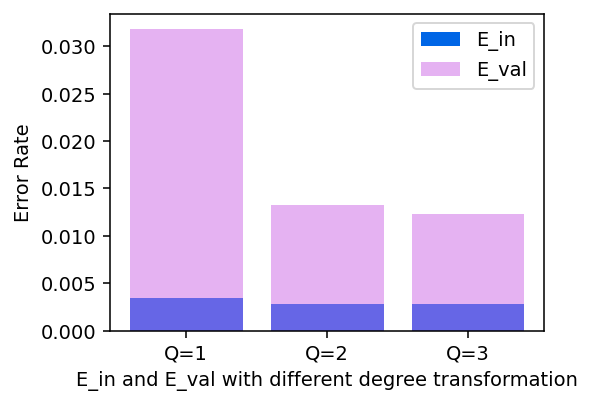

In [222]:
q0 = []
q0.extend([q1, q2, q3])
plt.rcParams["figure.figsize"] = (4,3)
tick =['Q=1', 'Q=2', 'Q=3']

plt.bar(range(3), q0, color=(0.0, 0.4, 0.9, 1.0))
df1 = pd.DataFrame ([q1,q2,q3],index = ['Q = 1','Q = 2','Q = 3'], columns = ['E_in'])

E_val = []
E_val.extend([E_val_1, E_val_2,E_val_3])

tick =['Q=1', 'Q=2', 'Q=3']
plt.xlabel('E_in and E_val with different degree transformation')
plt.ylabel('Error Rate')
plt.xticks(range(3), tick)
plt.bar(range(3), E_val, color=(0.8, 0.4, 0.9, 0.5))
# plt.legend(loc="upper right") 
E = ['E_in', 'E_val']
plt.legend(E,loc="upper right")


df2 = pd.DataFrame(E_val, index = ['Q = 1','Q = 2','Q = 3'], columns = ['E_val'])
df = df1.join(df2)
df

### Observation from Training: 
* I use 64 features to compute the data, so unfortunatly, the data can only compute up to Q = 3.
* From the purple bar of E_in we can see the error rate drops as we fit training data using higher dimension up to 60 iterations.
* Eventually as the iteration get big enough the error rate will drop and become stable and close to Q = 3
* For less iteration, higher Q generates smaller E_in.
* For iteration big enough, all the E_in form different Q get bottom up at highest Q. We can see already E_in of Q = 2 and 3 are equal after 60 iteration.

### Observation from Testing: 
* When computing Q form 1 to 3 for the testing data. The pink bar of E_val shows the error rate has the trend of flatting after Q = 2. 
* Although we can not compute for higher degrees, the data implies even we fit data higher than Q = 3, the error rate has the high chance would be at least the E_val of Q = 3. 
* Higher degree after Q = 2 dose not improve our w and result that much.
* Thus, fitting data into higher dimension very likely could cause overfitting and unnecessary computations, as well as include too much noice to the result. And from Q = 3, we can already see this trend. Also form what we have learned from the class, as the dimension gets higher, the E_val would actually go up after certain threshold. My experiments shows , Q = 3 could be such threshold. But after thtat, the computer is not able to compute.

* This is the end of the report.